## Підсумкова контрольна робота КСВД

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
from vega_datasets import data

### Завдання 1
Загрузити датасет Global YouTube Statistics 2023

1. Прочитайте CSV файл

In [2]:
df_youtube = pd.read_csv("Global_YouTube_Statistics.csv", encoding="ISO-8859-1")

2. Виведіть перші п'ять рядків

In [3]:
df_youtube.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
# перейменувала ще колонки у стилі "snake_case", аби було зручніше звертатися до них
df_youtube.columns = df_youtube.columns.str.replace(" ", "_").str.lower()
df_youtube.columns

Index(['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title',
       'uploads', 'country', 'abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'gross_tertiary_education_enrollment_(%)', 'population',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude'],
      dtype='object')

3. Виведіть розміри датасету, перевірте наявність пропусків, дублікатів.

In [5]:
rows, cols = df_youtube.shape
print(f"Датасет містить {rows} рядків та {cols} стовпців")

Датасет містить 995 рядків та 28 стовпців


In [6]:
print("Кількість пропусків:")
df_youtube.isna().sum()

Кількість пропусків:


rank                                         0
youtuber                                     0
subscribers                                  0
video_views                                  0
category                                    46
title                                        0
uploads                                      0
country                                    122
abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [7]:
print("Кількість дублікатів:", df_youtube.duplicated().sum())

Кількість дублікатів: 0


4. Якщо є пропуски, замінить тип даних на float і середнє значення за
стовпцем.

In [8]:
df_youtube = df_youtube.fillna(df_youtube.mean())
# перетворювати на числовий тип додатково не бачу сенсу,
# бо замінюється і так в числових(якщо треба було б перетворити, я б використала .astype(float))

C:\Users\nasty\AppData\Local\Temp\ipykernel_10008\628883354.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_youtube = df_youtube.fillna(df_youtube.mean())


In [9]:
# АЛЕ ж ми не можемо замінити середнім у стовпчиках нечислового типу

# тому у стовпчиках category, сountry, abbreviation, channel_type
columns = ["category", "country", "abbreviation", "channel_type"]
query = {col: "NaN" for col in columns}
df_youtube = df_youtube.fillna(query)

5. Ще раз перевірте кількість пропусків.

In [10]:
df_youtube.isna().sum()

rank                                       0
youtuber                                   0
subscribers                                0
video_views                                0
category                                   0
title                                      0
uploads                                    0
country                                    0
abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              5
created_date                               0
gross_tert

6. Перевірте, скільки унікальних країн представлено у колонці "Country"

In [11]:
print("Кількість унікальних країн у колонці 'Country':", df_youtube["country"].nunique() - 1)  # додала -1, аби не враховували значення NaN як країну

Кількість унікальних країн у колонці 'Country': 49


7. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):

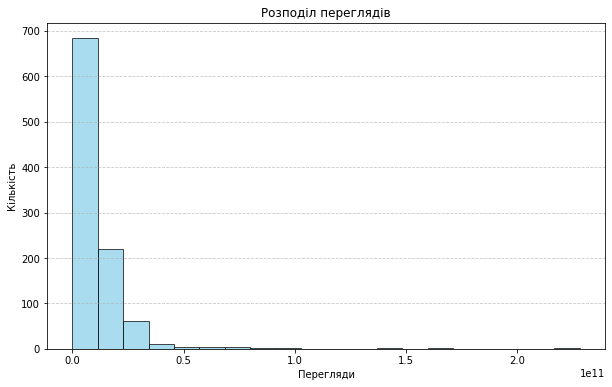

In [12]:
plt.figure(figsize=(10, 6))

df_youtube["video_views"].plot(kind="hist", bins=20, edgecolor="black", color="skyblue", alpha=0.7)
plt.title("Розподіл переглядів")
plt.xlabel("Перегляди")
plt.ylabel("Кількість")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

8. Визначте максимальну, мінімальну, середню кількість переглядів
(використовуйте методи max, min, mean)

In [13]:
print("Максимальна кількість переглядів:", df_youtube["video_views"].max())
print("Мінімальна кількість переглядів:", df_youtube["video_views"].min())
print("Середня кількість переглядів:", df_youtube["video_views"].mean())

Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819


9. Знайдіть країну, де найбільше відео було завантажено на YouTube

In [14]:
country_video_counts = df_youtube.groupby("country")["uploads"].count()

country = country_video_counts.idxmax()
print("Країна з найбільшою кількістю відео на YouTube:", country)
video_count = country_video_counts.max()
print("Кількість відео в цій країні:", video_count)

Країна з найбільшою кількістю відео на YouTube: United States
Кількість відео в цій країні: 313


10. Знайдіть відео (виведіть його назву) з найбільшою та найменшою
кількістю завантажень uploads.

In [15]:
max_uploads_index = df_youtube["uploads"].idxmax()
min_uploads_index = df_youtube["uploads"].idxmin()

video_with_max_uploads = df_youtube.loc[max_uploads_index, "title"]
video_with_min_uploads = df_youtube.loc[min_uploads_index, "title"]

print("Відео з найбільшою кількістю завантажень:", video_with_max_uploads)
print("Відео з найменшою кількістю завантажень:", video_with_min_uploads)

Відео з найбільшою кількістю завантажень: ABP NEWS
Відео з найменшою кількістю завантажень: Music


---

### Завдання 2.
Далі працюємо з файлом shopping_trends.csv

Загрузіть цей файл. 

In [16]:
df_trends = pd.read_csv("shopping_trends.csv")
df_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Перевірте:
- розмір таблиці

In [17]:
rows, cols = df_trends.shape
print(f"Датасет містить {rows} рядків та {cols} стовпців")

Датасет містить 3900 рядків та 19 стовпців


- наявність пропусків

In [18]:
print("Кількість пропусків:")
df_trends.isna().sum()

Кількість пропусків:


Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [19]:
print("Кількість дублікатів:", df_trends.duplicated().sum())

Кількість дублікатів: 0


- тип стовпців 

In [20]:
df_trends.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

Перейменуйте назви стовпців: Змініть прописні букви на строчні
(маленькі) та пробіл на підкреслення.

In [21]:
df_trends.columns = df_trends.columns.str.replace(" ", "_").str.lower()
df_trends.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')

Далі виконайте наступні завдання. Побудуйте графіки з використанням бібліотеки seaborn.

In [22]:
sns.set(style ="whitegrid")
color_palette = sns.color_palette("pastel")

1. Гістограма віку (age)

Побудуйте гістограму віку клієнтів, використовуючи Seaborn.

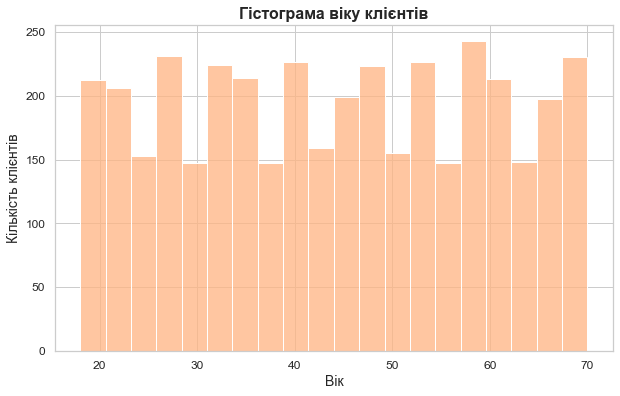

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_trends, x="age", bins=20, color="#ffb482")
plt.title("Гістограма віку клієнтів", fontsize=16, fontweight="bold")
plt.xlabel("Вік", fontsize=14)
plt.ylabel("Кількість клієнтів", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

2. Порівняння розподілу покупок за статтею (item_purchased)

Створіть стовпчасту діаграму або графік розподілу, щоб порівняти, які
товари покупають клієнти найчастіше.

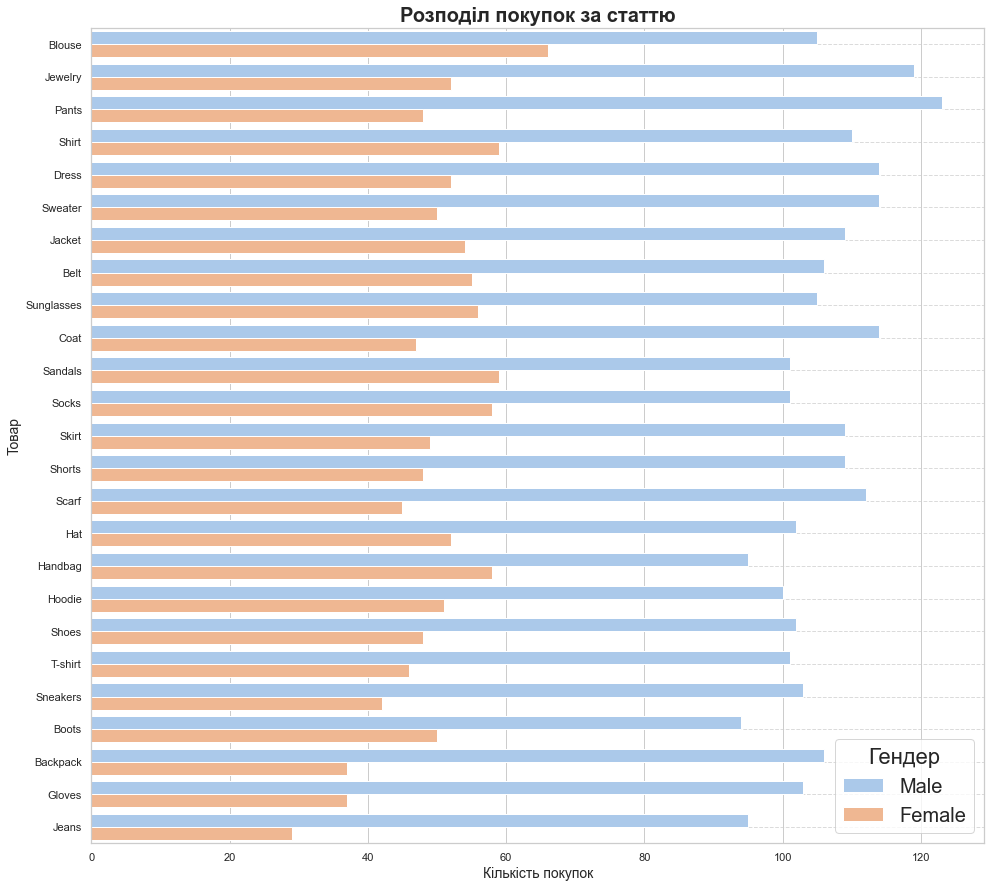

In [24]:
plt.figure(figsize=(16, 15))

sns.countplot(
    data=df_trends,
    y="item_purchased",
    hue="gender",
    order=df_trends["item_purchased"].value_counts().index,
    palette=color_palette,
)
# транспонувала для зручності

plt.title("Розподіл покупок за статтю", fontsize=20, fontweight="bold")
plt.xlabel("Кількість покупок", fontsize=14)
plt.ylabel("Товар", fontsize=14)
plt.legend(title="Гендер", fontsize=20, title_fontsize=22)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

3. Залежність між віком та сумою покупок (purchase_amount)

Використовуйте scatter plot, щоб візуалізувати залежність між віком та
сумою покупок.

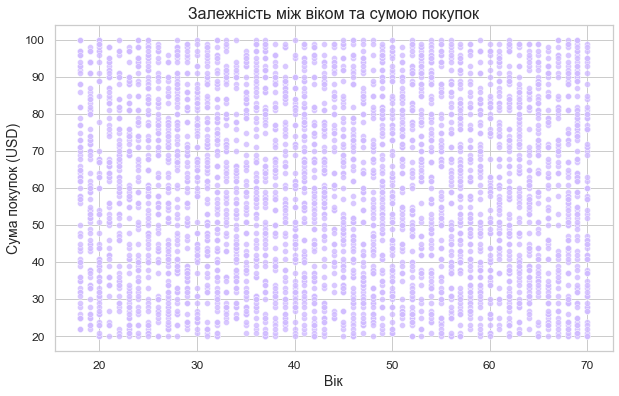

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_trends, x="age", y="purchase_amount_(usd)", alpha=0.8, color="#d0bbff")
plt.title("Залежність між віком та сумою покупок", fontsize=16)
plt.xlabel("Вік", fontsize=14)
plt.ylabel("Сума покупок (USD)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

4. Графік розподілу оцінок товарів (review_rating)

Побудуйте графік розподілу оцінок товарів для оцінки якості.

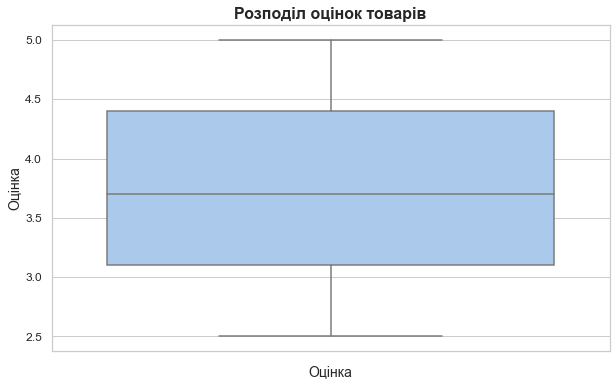

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_trends, y="review_rating", color="#a1c9f4")
plt.title("Розподіл оцінок товарів", fontsize=16, fontweight="bold")
plt.xlabel("Оцінка", fontsize=14)
plt.ylabel("Оцінка", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

- і можна подивитися за допомогою гістограми 

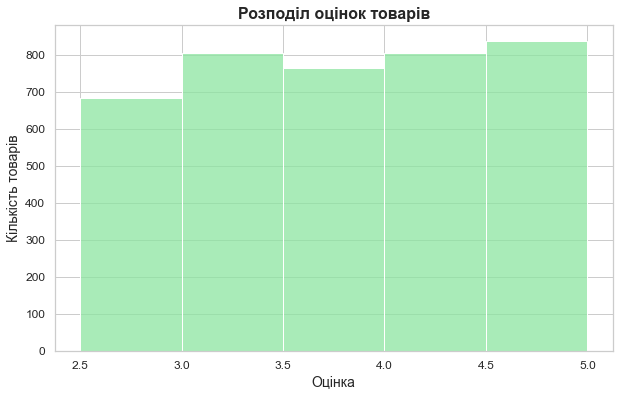

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_trends, x="review_rating", bins=5, color="#8de5a1", kde=False)
plt.title("Розподіл оцінок товарів", fontsize=16, fontweight="bold")
plt.xlabel("Оцінка", fontsize=14)
plt.ylabel("Кількість товарів", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

5. Категоріальна діаграма для статі (gender)

Створіть категоріальну діаграму, щоб відобразити розподіл покупок за
статтею.

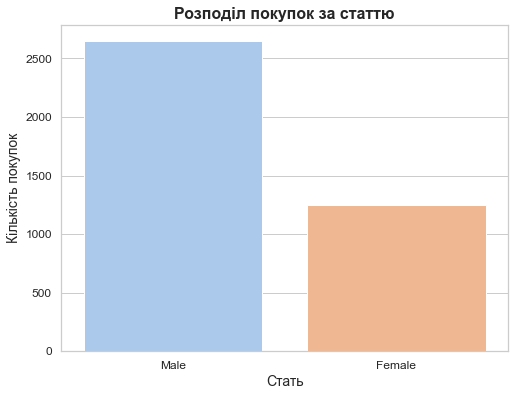

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_trends, x="gender", palette=color_palette)
plt.title("Розподіл покупок за статтю", fontsize=16, fontweight="bold")
plt.xlabel("Стать", fontsize=14)
plt.ylabel("Кількість покупок", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

6. Залежність між рейтингом і сумою покупок (review_rating і
purchase_amount)

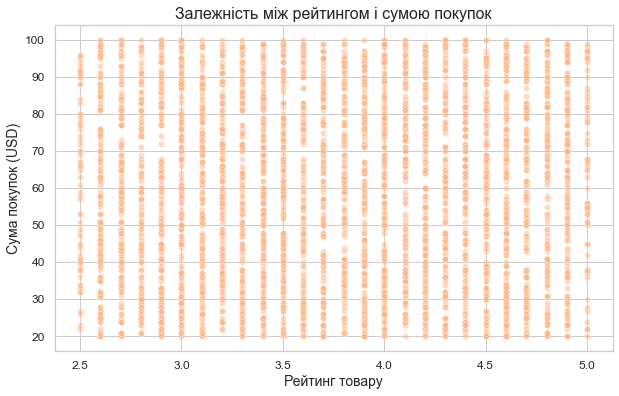

In [29]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_trends,
    x="review_rating",
    y="purchase_amount_(usd)",
    alpha=0.5,
    color="#ffb482")

plt.title("Залежність між рейтингом і сумою покупок", fontsize=16)
plt.xlabel("Рейтинг товару", fontsize=14)
plt.ylabel("Сума покупок (USD)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

---
### Завдання 3

1. Створіть горизонтальну діаграму з мітками на основі даних про
врожайність пшениці (data.wheat()) за допомогою бібліотеки Altair.
Задайте вісь x для врожайності пшениці, вісь y для років, а текстові
мітки відображайте значення врожайності пшениці на відповідних
роках.

In [30]:
source = data.wheat()
source.head()

,year,wheat,wages
0,1565,41.0,5.00
1,1570,45.0,5.05
2,1575,42.0,5.08
3,1580,49.0,5.12
4,1585,41.5,5.15


In [31]:
bar_chart = (
    alt.Chart(source)
    .mark_bar()
    .encode(x="wheat:Q", y="year:O", text="wheat:Q", color=alt.value("darkblue"))
    .properties(title="Врожайність пшениці за роками", width=600, height=700)
)

chart = bar_chart.mark_bar() + bar_chart.mark_text(align="left", dx=2)

chart = chart.configure_axis(labelFontSize=14, titleFontSize=14).configure_title(fontSize=20)

chart = chart.encode(x=alt.X("wheat:Q", title="Врожайність пшениці"), 
                     y=alt.Y("year:O", title="Роки"))

chart.display()

alt.LayerChart(...)

2. Створіть багатошарову діаграму на основі даних про виробництво
електроенергії в штаті Айова (data.iowa_electricity()) за допомогою
бібліотеки Altair . Вісь x представляє роки, вісь y відображає чисте
виробництво електроенергії (net_generation), а кожен шар діаграми
позначає різні джерела енергії (source). Встановіть прозорість (opacity)
для стовпців на рівні 0.7.

In [32]:
source = data.iowa_electricity()
source.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [33]:
source["year"] = pd.to_datetime(source["year"]).dt.year
source.head()

,year,source,net_generation
0,2001,Fossil Fuels,35361
1,2002,Fossil Fuels,35991
2,2003,Fossil Fuels,36234
3,2004,Fossil Fuels,36205
4,2005,Fossil Fuels,36883


In [37]:
chart_iowa = (
    alt.Chart(source)
    .mark_bar(opacity=0.7)
    .encode(
        x=alt.X("year:O", title="Роки", axis=alt.Axis(labelAngle=-45)),
        y=alt.Y("net_generation:Q", title="Кількість електроенергії"),
        color="source:N"
        )
    .properties(
        title="Виробництво електроенергії в штаті Айова",
        width=700,
        height=400
        )
    
    .configure_axis(labelFontSize=12, titleFontSize=14)
    .configure_title(fontSize=20)
)

chart_iowa.display()

alt.Chart(...)

3. Створіть графік за допомогою бібліотеки Plotly (scatter plot) для даних
ірисів (iris dataset), де:
- Вісь X (x-axis) відповідає ширині чашелистика (sepal width).
- Вісь Y (y-axis) відповідає довжині чашелистика (sepal length).
- Кожен пункт на графіку має розмір, який залежить від довжини
пелюстки (petal length).
- Кожен пункт на графіку має різний колір в залежності від виду
(species).
- При наведенні на пункт повинні відображатися додаткові дані, такі як
ширина пелюстки (petal width)

In [35]:
df_iris = px.data.iris()
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [36]:
fig = px.scatter(
    df_iris,
    x="sepal_width",
    y="sepal_length",
    size="petal_length",
    color="species",
    hover_data={"petal_width": True, "species": False},
)

fig.update_traces(marker=dict(line=dict(width=1, color="DarkSlateGrey")),selector=dict(mode="markers"))

fig.update_layout(title="Іриси", xaxis_title="Ширина чашелистика", yaxis_title="Довжина чашелистика")

fig.show()